## **Álgebra Linear** | Data Science
> Realização do trabalho para o curso de Álgebra Linar utilizando a análise de componentes principais em um conjunto de dados
##### Este conjunto de dados contém informações sobre o custo de vida em quase 5.000 cidades em todo o mundo
##### Os dados foram coletados raspando o site da Numbeo, https://www.numbeo.com


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

### Requisitos para a Análise
Os dados devem ser padronizados, ou seja, devem ser consistente em seu padrão em relação a outra váriavel, além de que devem ser variáveis quantitativas discretas ou contínuas

* Por isso, manipularemos os dados para a melhor interpretação das colunas
* Padronizaremos os dados antes da análise,. os dados vem no formato USD e L, Kg e g.
* Utilização do dicionário dos dados

*Mas primeiro precisamos tratar os dados*

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/cost-of-living.csv')
dic = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Principal-Component-Analysis/main/dictionary.csv')

### Tratamento e Manipulação | Criação da Amostra
* Resolvi deixar os nomes completos, ao invez de tentar encurtalos pois poderia haver alguma confusão com a identificação
* Exclusão das linhas com a qualidade dos dados igual a Zero, pois são necessários mais contribuidores para aumentar a qualidade dos dados

In [155]:
# Seleção de linhas onde a qualidade dos dados são boas
df = df.loc[df['data_quality'] == 1, :]

# Remover uma coluna a mais contendo o index, e a qualidade dos dados
if len(df.columns) == 59:
    df = df.iloc[:, 1:58].reset_index(drop=True)
    
# Renomeação das colunas
df.columns = ['Nome da cidade', 'Nome do país', 'Refeição, restaurante barato', 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos', 'McMeal no McDonalds (ou Combo Refeição Equivalente)', 'Cerveja Nacional (0,5 litro de chope, em restaurantes)', 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)', 'Cappuccino (normal, em restaurantes)', 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)', 'Água (garrafa de 0,33 litros, em restaurantes)', 'Leite (comum), (1 litro)', 'Pão Branco Fresco (500g)', 'Arroz (branco), (1kg)', 'Ovos (comuns) (12)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)', 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)', 'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)', 'Alface (1 cabeça)', 'Água (garrafa de 1,5 litro, no mercado)', 'Garrafa de Vinho (Média, no mercado)', 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)', 'Cerveja Importada (garrafa de 0,33 litro, no mercado)', 'Pacote de 20 cigarros (Marlboro)', 'Bilhete de ida (transporte local)', 'Passe mensal (preço normal)', 'Taxi Start (tarifa normal)', 'Táxi 1km (Tarifa Normal)', 'Táxi 1 hora de espera (tarifa normal)', 'Gasolina (1 litro)', 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)', 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)', 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2', '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)', 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)', 'Fitness Club, mensalidade para 1 adulto', 'Aluguel de quadra de tênis (1 hora no fim de semana)', 'Cinema, Lançamento Internacional, 1 Lugar', 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança', 'Escola primária internacional, anual para 1 criança', '1 par de jeans (Levis 501 ou similar)', '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)', '1 par de tênis de corrida Nike (gama média)', '1 par de sapatos masculinos de negócios em couro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro', 'Preço por metro quadrado para comprar apartamento no centro da cidade', 'Preço por metro quadrado para comprar apartamento fora do centro', 'Salário Líquido Médio Mensal (Após Impostos)', 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa']

In [156]:
# Organização das colunas
df = df[['Nome da cidade', 'Nome do país',
 'Salário Líquido Médio Mensal (Após Impostos)',
 'Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa',
 
 # Bens materiais
 '1 par de jeans (Levis 501 ou similar)',
 '1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)',
 '1 par de tênis de corrida Nike (gama média)',
 '1 par de sapatos masculinos de negócios em couro',
 'Preço por metro quadrado para comprar apartamento no centro da cidade',
 'Preço por metro quadrado para comprar apartamento fora do centro',
 'Apartamento (1 quarto) no centro da cidade',
 'Apartamento (1 quarto) Fora do Centro',
 'Apartamento (3 quartos) no centro da cidade',
 'Apartamento (3 quartos) Fora do Centro',
 'Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente)',
 'Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente)',
 
 # Necessidades
 
 'Leite (comum), (1 litro)',
 'Água (garrafa de 0,33 litros, em restaurantes)',
 'Água (garrafa de 1,5 litro, no mercado)',
 'Arroz (branco), (1kg)',
 'Queijo Nacional (1kg)',
 'Filetes de Frango (1kg)',
 'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)',
 'Maçãs (1kg)',
 'Banana (1kg)',
 'Laranjas (1kg)',
 'Tomate (1kg)',
 'Batata (1kg)',
 'Cebola (1kg)',
 'Pão Branco Fresco (500g)',
 'Alface (1 cabeça)',
 'Ovos (comuns) (12)',

 # Planos e Serviços
 'Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança',
 'Escola primária internacional, anual para 1 criança',
 'Gasolina (1 litro)',
 'Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)',
 'Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2',
 '1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos)',
 'Bilhete de ida (transporte local)',
 'Passe mensal (preço normal)',
 'Taxi Start (tarifa normal)',
 'Táxi 1km (Tarifa Normal)',
 'Táxi 1 hora de espera (tarifa normal)',
 'Fitness Club, mensalidade para 1 adulto',
 
 # Lazer e Outros
 'Cinema, Lançamento Internacional, 1 Lugar',
 'Refeição, restaurante barato',
 'Refeição para 2 Pessoas, Restaurante Médio, Três Pratos',
 'Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)',
 'Cappuccino (normal, em restaurantes)',
 'McMeal no McDonalds (ou Combo Refeição Equivalente)',
 'Aluguel de quadra de tênis (1 hora no fim de semana)',
 'Garrafa de Vinho (Média, no mercado)',
 'Cerveja Nacional (0,5 litro de chope, em restaurantes)',
 'Cerveja Importada (garrafa de 0,33 litro, em restaurantes)',
 'Cerveja Nacional (garrafa de 0,5 litro, no mercado)',
 'Cerveja Importada (garrafa de 0,33 litro, no mercado)',
 'Pacote de 20 cigarros (Marlboro)']]

In [157]:
display(df.head(10))

,Nome da cidade,Nome do país,Salário Líquido Médio Mensal (Após Impostos),"Taxa de Juros de Hipoteca em Percentuais (%), Anual, por 20 Anos Taxa Fixa",1 par de jeans (Levis 501 ou similar),"1 Vestido de Verão numa Rede de Lojas (Zara, H&M, …)",1 par de tênis de corrida Nike (gama média),1 par de sapatos masculinos de negócios em couro,Preço por metro quadrado para comprar apartamento no centro da cidade,Preço por metro quadrado para comprar apartamento fora do centro,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,Volkswagen Golf 1.4 90 KW Trendline (ou carro novo equivalente),Toyota Corolla Sedan 1.6l 97kW Comfort (ou carro novo equivalente),"Leite (comum), (1 litro)","Água (garrafa de 0,33 litros, em restaurantes)","Água (garrafa de 1,5 litro, no mercado)","Arroz (branco), (1kg)",Queijo Nacional (1kg),Filetes de Frango (1kg),Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira),Maçãs (1kg),Banana (1kg),Laranjas (1kg),Tomate (1kg),Batata (1kg),Cebola (1kg),Pão Branco Fresco (500g),Alface (1 cabeça),Ovos (comuns) (12),"Pré-escola (ou jardim de infância), dia inteiro, particular, mensal para 1 criança","Escola primária internacional, anual para 1 criança",Gasolina (1 litro),"Internet (60 Mbps ou mais, dados ilimitados, cabo/ADSL)","Básico (Eletricidade, Aquecimento, Arrefecimento, Água, Lixo) para Apartamento de 85m2",1 minuto. de Tarifa Móvel Pré-pago Local (Sem Descontos ou Planos),Bilhete de ida (transporte local),Passe mensal (preço normal),Taxi Start (tarifa normal),Táxi 1km (Tarifa Normal),Táxi 1 hora de espera (tarifa normal),"Fitness Club, mensalidade para 1 adulto","Cinema, Lançamento Internacional, 1 Lugar","Refeição, restaurante barato","Refeição para 2 Pessoas, Restaurante Médio, Três Pratos","Coca-Cola/Pepsi (garrafa de 0,33 litro, em restaurantes)","Cappuccino (normal, em restaurantes)",McMeal no McDonalds (ou Combo Refeição Equivalente),Aluguel de quadra de tênis (1 hora no fim de semana),"Garrafa de Vinho (Média, no mercado)","Cerveja Nacional (0,5 litro de chope, em restaurantes)","Cerveja Importada (garrafa de 0,33 litro, em restaurantes)","Cerveja Nacional (garrafa de 0,5 litro, no mercado)","Cerveja Importada (garrafa de 0,33 litro, no mercado)",Pacote de 20 cigarros (Marlboro)
0,Delhi,India,586.35,7.96,32.05,33.34,49.35,36.26,2619.46,1068.90,223.87,133.38,596.16,325.82,12242.64,22972.31,0.73,0.19,0.36,0.88,4.32,3.79,5.57,1.80,0.75,1.01,0.60,0.36,0.41,0.51,0.70,1.01,73.76,1985.70,1.25,7.96,57.37,0.01,0.49,11.63,0.61,0.22,1.22,21.07,4.90,4.90,22.04,0.48,1.78,4.28,8.47,9.79,1.84,3.67,1.53,2.51,4.28
1,Shanghai,China,1382.83,5.01,69.17,34.26,86.55,121.19,17333.09,9174.88,1080.07,564.30,2972.57,1532.23,19554.98,20360.82,2.68,0.32,0.62,1.18,18.01,4.67,12.79,2.22,1.55,2.11,1.47,0.82,1.02,2.57,0.82,2.17,1356.63,25883.49,1.17,16.74,64.76,0.03,0.56,27.94,2.10,0.42,8.38,63.23,8.38,5.59,40.51,0.52,3.96,5.59,14.67,13.97,1.12,4.19,0.91,1.93,3.49
2,Jakarta,Indonesia,483.19,9.15,38.87,25.95,72.89,80.32,2694.05,1269.44,482.85,270.15,1117.69,584.37,25489.74,27978.73,1.28,0.27,0.42,0.83,6.66,3.46,8.32,2.80,1.52,2.08,1.24,1.35,2.10,1.21,1.13,1.70,132.74,9934.37,0.79,30.45,80.12,0.11,0.22,9.53,0.41,0.29,2.86,30.86,3.18,2.54,22.25,0.59,2.19,3.50,11.71,20.66,2.02,3.18,2.06,3.18,2.22
3,Manila,Philippines,419.02,7.80,38.45,26.96,69.47,61.82,3536.04,2596.44,559.52,281.78,1754.40,684.81,22984.03,18200.60,1.63,0.51,0.65,0.89,5.06,4.19,6.64,2.66,1.42,2.95,1.42,1.76,1.75,1.19,1.36,1.73,254.89,10860.59,1.38,38.02,97.45,0.15,0.53,11.86,0.71,0.24,2.12,48.09,5.48,3.54,27.40,0.93,2.91,3.54,5.85,8.84,1.24,1.90,1.15,1.55,2.65
4,Seoul,South Korea,2672.23,3.47,56.99,45.49,70.21,108.30,21847.94,10832.90,809.83,583.60,2621.05,1683.74,28648.67,26851.06,2.13,0.78,1.06,3.66,11.13,10.62,40.41,6.79,3.70,6.40,6.36,3.86,2.81,2.78,2.40,4.02,384.01,18283.99,1.41,22.06,176.24,0.16,0.98,41.47,2.86,0.90,9.05,54.84,9.42,7.16,52.77,

## Pequena análise da Correlação
* Uma visualização das correlações dos alimentos

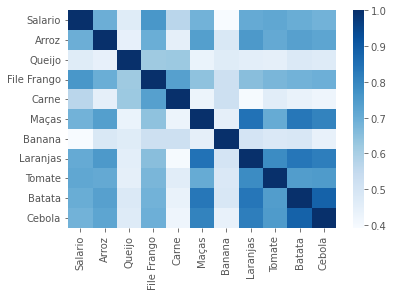

In [158]:
# Criação da Matriz de Correlação, da pequena parcela dos dados para uma pequena análise
cols = ['Salario', 'Arroz', 'Queijo', 'File Frango', 'Carne', 'Maças', 'Banana', 'Laranjas', 'Tomate', 'Batata', 'Cebola']
cr = df[['Salário Líquido Médio Mensal (Após Impostos)', 'Arroz (branco), (1kg)', 'Queijo Nacional (1kg)', 'Filetes de Frango (1kg)',
         'Carne Redonda (1kg) (ou Carne Vermelha Equivalente da Perna Traseira)', 'Maçãs (1kg)', 'Banana (1kg)', 'Laranjas (1kg)',
         'Tomate (1kg)', 'Batata (1kg)', 'Cebola (1kg)']].corr()
sns.heatmap(cr, xticklabels=cols, yticklabels=cols, cmap='Blues');

### Principal Component Analysis | Moradia
* Decomposição da Matriz de Covariância
* Outras análises com a Matriz

In [196]:
# Convertendo os dados da moradia em uma Matriz
mtz = np.matrix(df.iloc[:, 10:14])

# Covariancia
cv = np.cov(np.transpose(mtz))

In [199]:
# Visualização da diagonal principal da matriz de covariancia
np.diagonal(cv)

array([ 369952.15720707,  234232.86442369, 1078283.98756868,
        601890.81045384])

In [209]:
# Definindo 4 componentes principais
pca = PCA(n_components=4)
pca.fit(mtz)

PCA(n_components=4)

In [211]:
# Aqui são os Coefcientes de uma combinação linear das variaveis, que originam a componente principal
pca.components_

array([[ 0.39226733,  0.30791793,  0.69573559,  0.51697667],
       [ 0.60974825,  0.56592022, -0.55200455, -0.05685381],
       [ 0.39784864, -0.09939191,  0.42090457, -0.80912116],
       [ 0.56218313, -0.7583153 , -0.18461395,  0.2735429 ]])

In [214]:
# Explicação dos componentes em 90% da variabilidade dos dados
pca.explained_variance_ratio_
# Logo, a primeira componente explica 95% da variabilidade

array([0.94738385, 0.03500285, 0.0152623 , 0.002351  ])

In [215]:
# Visualização das componentes acumuladas
pca.explained_variance_ratio_.cumsum()
# Logo, ao utilizar 2 componentes principais, teremos uma explicação melhor

array([0.94738385, 0.98238669, 0.997649  , 1.        ])

### Análise com 2 componentes

In [221]:
# Criação da variavel Home
hm = df.iloc[:, 10:14]
hm.head(3)

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro
0,223.870,133.380,596.160,325.820
1,1080.070,564.300,2972.570,1532.230
2,482.850,270.150,1117.690,584.370


In [217]:
# Redefinindo para 2 componentes principais
pca = PCA(n_components=2)
pca.fit(mtz)

# Pesos das componentes principais
pca.components_

array([[ 0.39226733,  0.30791793,  0.69573559,  0.51697667],
       [ 0.60974825,  0.56592022, -0.55200455, -0.05685381]])

In [252]:
pca1 = pca.transform(mtz)[:,0]
pca2 = pca.transform(mtz)[:,1]

# Esses coeficientes nas variaveis, indicam a direção do crescimento delas
hm['PCA_One'] = pca1
hm['PCA_Two'] = pca2


#### Componentes
* Vemos que pelos um ou outro componente principal, o maior deles está em 3º posição, ou seja, em Apartamento (3 quartos) no centro da cidade, quanto menor o componente, melhor será o preço para quem está pagando

In [233]:
# Pelo primeiro componente, temos que o Apartamento (3 quartos) no centro da cidade tem o maior peso
display(pca.components_[0])
display(hm.head(3))

array([0.39226733, 0.30791793, 0.69573559, 0.51697667])

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
0,223.870,133.380,596.160,325.820,-1362.350,-112.623
1,1080.070,564.300,2972.570,1532.230,1383.237,-727.068
2,482.850,270.150,1117.690,584.370,-722.135,-179.896


In [237]:
# Ordenando pela primeira componente principal
hm.sort_values('PCA_One')

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
149,51.980,53.460,103.580,72.400,-1928.103,23.653
179,69.800,43.810,148.510,80.190,-1888.797,3.813
835,77.790,53.650,134.120,107.300,-1878.630,20.656
159,53.740,45.190,181.390,131.430,-1845.307,-26.261
443,53.840,53.840,187.270,121.720,-1843.533,-23.999
...,...,...,...,...,...,...
707,2950.000,2500.000,4666.670,3666.670,4994.887,452.068
69,2660.730,1965.720,5317.610,3466.530,5066.316,-374.617
765,2247.500,1866.670,5166.670,4083.330,5087.577,-634.385
314,3250.000,2050.000,6666.670,4325.000,6705.817,-761.109


In [242]:
# Ordenando pela segunda componente principal, no qual o Apartamento (1 quarto) no centro da cidade tem o maior peso
display(pca.components_[1])
hm.sort_values('PCA_Two', ascending=False) # Ornenando por decrescente

array([ 0.60974825,  0.56592022, -0.55200455, -0.05685381])

,Apartamento (1 quarto) no centro da cidade,Apartamento (1 quarto) Fora do Centro,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
214,6678.340,4996.740,1230.510,921.460,3416.316,6191.224
830,3002.940,1341.310,2762.710,2102.060,2525.353,968.570
854,2700.000,2250.000,3633.330,3500.000,4014.745,738.035
548,2575.770,2390.620,4057.270,3475.620,4291.659,509.235
781,1775.000,1666.670,2566.670,2466.670,2195.959,491.450
...,...,...,...,...,...,...
314,3250.000,2050.000,6666.670,4325.000,6705.817,-761.109
384,583.440,342.550,2437.320,1413.040,686.133,-853.144
34,818.640,427.130,3093.890,3248.590,2210.174,-1128.653
213,2275.440,1070.130,5932.670,2562.690,4600.066,-1404.509


### Concluindo
* Se caso eu queira buscar pela apartamento (seja qual for ele) com o menor preço, com base no custo de vida, eu buscaria pelos componentes


In [279]:
price = df[['Nome da cidade','Nome do país', 'Apartamento (1 quarto) Fora do Centro', 'Apartamento (1 quarto) no centro da cidade', 'Apartamento (3 quartos) no centro da cidade', 'Apartamento (3 quartos) Fora do Centro']]
price['PCA_One'] = pca1
price['PCA_Two'] = pca2

### Conclusão da Análise
#### Logo, temos uma visão multivariavda dos preços dos apartamentos, no qual estão inter-relacionadas, obteno assim um aproveitamento maior em comparação a uma análise de dados simples, ou utilizando a ordenação pelo menor preço

In [304]:
price.sort_values('PCA_One', ascending=1).head(30)

,Nome da cidade,Nome do país,Apartamento (1 quarto) Fora do Centro,Apartamento (1 quarto) no centro da cidade,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
149,Peshawar,Pakistan,53.460,51.980,103.580,72.400,-1928.103,23.653
179,Hyderabad City,Pakistan,43.810,69.800,148.510,80.190,-1888.797,3.813
835,Trabzon,Turkey,53.650,77.790,134.120,107.300,-1878.630,20.656
159,Multan,Pakistan,45.190,53.740,181.390,131.430,-1845.307,-26.261
443,Sylhet,Bangladesh,53.840,53.840,187.270,121.720,-1843.533,-23.999
92,Faisalabad,Pakistan,50.790,83.160,173.750,133.230,-1836.427,-1.038
429,Jammu,India,91.820,138.750,146.910,106.100,-1834.686,72.435
163,Bhopal,India,45.300,68.350,208.120,116.310,-1828.761,-31.186
654,Aydin,Turkey,81.810,135.460,166.310,104.610,-1826.332,54.140
834,Denizli,Turkey,78.680,96.570,195.810,100.140,-1824.337,12.626


In [306]:
# Mais caro pelo componente 2
price.sort_values('PCA_Two', ascending=0).head(30)

,Nome da cidade,Nome do país,Apartamento (1 quarto) Fora do Centro,Apartamento (1 quarto) no centro da cidade,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
214,Sharjah,United Arab Emirates,4996.740,6678.340,1230.510,921.460,3416.316,6191.224
830,Walton upon Thames,United Kingdom,1341.310,3002.940,2762.710,2102.060,2525.353,968.570
854,Aventura,United States,2250.000,2700.000,3633.330,3500.000,4014.745,738.035
548,Irvine,United States,2390.620,2575.770,4057.270,3475.620,4291.659,509.235
781,Everett,United States,1666.670,1775.000,2566.670,2466.670,2195.959,491.450
641,Olympia,United States,1391.250,1524.170,2096.250,1959.000,1423.018,471.178
448,Port St. Lucie,United States,1516.670,1800.000,2525.000,2300.000,2044.422,454.283
785,Bend,United States,1850.000,2300.000,3375.000,2760.000,3172.379,452.439
707,Sunnyvale,United States,2500.000,2950.000,4666.670,3666.670,4994.887,452.068
397,Brampton,Canada,1140.520,1431.980,1845.480,1669.520,985.527,427.956


In [307]:
# Mais caro pelo componente 1
price.sort_values('PCA_One', ascending=0).head(30)
# Os estados unidos possuem apartamentos mais caros conforme o custo de vida

,Nome da cidade,Nome do país,Apartamento (1 quarto) Fora do Centro,Apartamento (1 quarto) no centro da cidade,Apartamento (3 quartos) no centro da cidade,Apartamento (3 quartos) Fora do Centro,PCA_One,PCA_Two
707,Sunnyvale,United States,2500.000,2950.000,4666.670,3666.670,4994.887,452.068
548,Irvine,United States,2390.620,2575.770,4057.270,3475.620,4291.659,509.235
117,Brooklyn,United States,2028.570,2806.770,4308.330,2875.000,4134.956,340.757
854,Aventura,United States,2250.000,2700.000,3633.330,3500.000,4014.745,738.035
862,Blue Island,United States,2118.750,2500.000,3900.000,3250.000,3952.165,408.819
214,Sharjah,United Arab Emirates,4996.740,6678.340,1230.510,921.460,3416.316,6191.224
785,Bend,United States,1850.000,2300.000,3375.000,2760.000,3172.379,452.439
830,Walton upon Thames,United Kingdom,1341.310,3002.940,2762.710,2102.060,2525.353,968.570
781,Everett,United States,1666.670,1775.000,2566.670,2466.670,2195.959,491.450
448,Port St. Lucie,United States,1516.670,1800.000,2525.000,2300.000,2044.422,454.283


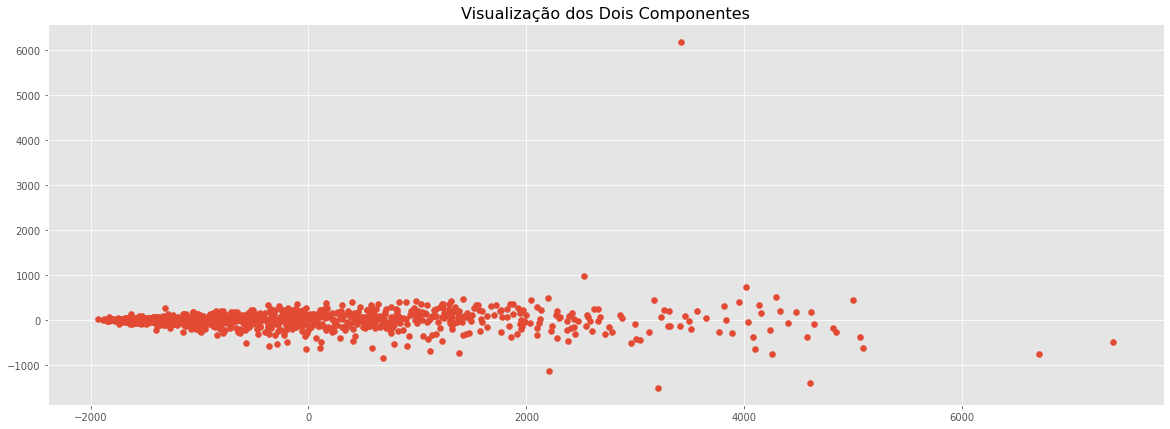

In [302]:
fig = plt.figure(figsize=(20,7))
plt.scatter(price['PCA_One'], price['PCA_Two'])
plt.title('Visualização dos Dois Componentes', fontdict={'fontsize': 16});
